# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

> **Do not use Copilot for this assignment.** I'd like for you to get some practice before AI does all the work!

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [2]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [3]:
df.shape

(1653, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [10]:
df.sort_values(by="networthusbillion", ascending=False).head(10)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
184,2014,Bill Gates,1,United States,USA,76.0,self-made,founder non-finance,male,58.0,...,founder,1975.0,NaN,Microsoft,NaN,NaN,http://www.forbes.com/profile/bill-gates/,NaN,NaN,NaN
226,2014,Carlos Slim Helu,2,Mexico,MEX,72.0,self-made,privatized and resources,male,74.0,...,founder,1990.0,NaN,telecom,NaN,NaN,http://www.ozy.com/provocateurs/carlos-slims-w...,NaN,NaN,NaN
79,2014,Amancio Ortega,3,Spain,ESP,64.0,self-made,founder non-finance,male,77.0,...,founder,1975.0,NaN,retail,NaN,NaN,http://www.forbes.com/profile/amancio-ortega/,NaN,NaN,NaN
1562,2014,Warren Buffett,4,United States,USA,58.2,self-made,founder non-finance,male,83.0,...,founder,1839.0,NaN,Berkshire Hathaway,NaN,NaN,http://www.forbes.com/lists/2009/10/billionair...,http://www.forbes.com/companies/berkshire-hath...,NaN,NaN
862,2014,Larry Ellison,5,United States,USA,48.0,self-made,founder non-finance,male,69.0,...,founder,1977.0,NaN,Oracle,NaN,NaN,http://www.forbes.com/profile/larry-ellison/,http://www.businessinsider.com/how-larry-ellis...,NaN,NaN
339,2014,David Koch,6,United States,USA,40.0,inherited,inherited,male,73.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
247,2014,Charles Koch,6,United States,USA,40.0,inherited,inherited,male,78.0,...,relation,1940.0,NaN,diversified,inherited from father,NaN,http://www.kochind.com/About_Koch/History_Time...,NaN,NaN,NaN
1364,2014,Sheldon Adelson,8,United States,USA,38.0,self-made,self-made finance,male,80.0,...,founder,1952.0,NaN,casinos,NaN,NaN,http://www.forbes.com/profile/sheldon-adelson/,http://lasvegassun.com/news/1996/nov/26/rat-pa...,NaN,NaN
280,2014,Christy Walton,9,United States,USA,36.7,inherited,inherited,female,59.0,...,relation,1962.0,NaN,Wal-Mart,widow,NaN,http://www.forbes.com/profile/christy-walton/,NaN,NaN,NaN
724,2014,Jim Walton,10,United States,USA,34.7,inherited,inherited,male,66.0,...,relation,1962.0,NaN,Wal-Mart,inherited from father,NaN,http://www.forbes.com/profile/jim-walton/,NaN,NaN,NaN


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [11]:
df.gender.unique()

array(['male', 'female'], dtype=object)

In [36]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

## 4b) What percent is that?

In [38]:
total = df.gender.count()

male = 1473/total*100
female = 180/total*100

print("male:", male, "femaile:", female)

male: 89.11070780399274 femaile: 10.88929219600726


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [42]:
df.groupby(by="gender").networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5a) What is the most common source/type of wealth?

In [54]:
df.sourceofwealth.value_counts().sort_values(ascending=False).head(10)

real estate        107
diversified         69
retail              63
investments         60
pharmaceuticals     42
hedge funds         34
banking             33
construction        32
media               24
consumer goods      19
Name: sourceofwealth, dtype: int64

## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [69]:
df.groupby(by="gender").get_group('male').sourceofwealth.value_counts().sort_values(ascending=False).head(10)

real estate        100
diversified         60
retail              60
investments         58
pharmaceuticals     40
hedge funds         34
banking             30
construction        27
media               18
software            18
Name: sourceofwealth, dtype: int64

In [70]:
df.groupby(by="gender").get_group('female').sourceofwealth.value_counts().sort_values(ascending=False).head(10)

diversified            9
real estate            7
media                  6
construction           5
hotels, investments    5
consumer goods         5
cleaning products      4
Wal-Mart               4
casinos                4
chemicals              4
Name: sourceofwealth, dtype: int64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [96]:
df.company.value_counts().head(5)

Hyatt                  11
Oetker-Gruppe           8
S. C. Johnson & Son     7
Alfa Group              6
Votorantim Group        6
Name: company, dtype: int64

<AxesSubplot: >

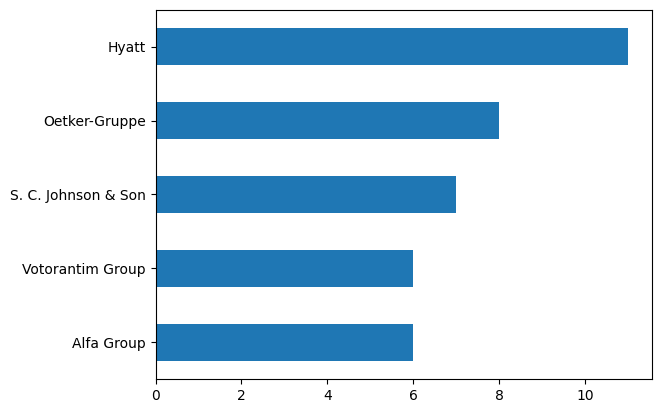

In [79]:
df.company.value_counts().head(5).sort_values().plot(kind="barh")




## 7) How much money do these top 5 billionaires have in total?

In [115]:
companies = df.groupby(by="company").sum()

hyatt = companies.query("company=='Hyatt'").networthusbillion[0]
oetker = companies.query("company=='Oetker-Gruppe'").networthusbillion[0]
johnson = companies.query("company=='S. C. Johnson & Son'").networthusbillion[0]
alfa = companies.query("company=='Alfa Group'").networthusbillion[0]
votorantim = companies.query("company=='Votorantim Group'").networthusbillion[0]

/var/folders/_c/dcjy1m9109bd_sq8l8j8zsdr0000gn/T/ipykernel_50262/3869163962.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  companies = df.groupby(by="company").sum()


In [117]:
top5 = hyatt + oetker + johnson + alfa + votorantim

top5

120.29999999999998

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [129]:
df.groupby(by="citizenship").sum(numeric_only=True).sort_values(by="networthusbillion", ascending=False).head(10)




,year,rank,networthusbillion,age,north,politicalconnection,founder,foundingdate,gdpcurrentus
citizenship,,,,,,,,,
United States,1004986,367851,2322.4,31811.0,499,0.0,289,977568.0,0.0
Russia,223554,97160,422.5,5772.0,0,20.0,59,216555.0,0.0
Germany,171190,51401,401.4,5350.0,85,0.0,23,163852.0,0.0
China,306128,150807,375.8,7840.0,0,1.0,86,292792.0,0.0
France,86602,31828,235.3,2906.0,43,0.0,20,83579.0,0.0
Hong Kong,90630,32871,213.7,2798.0,0,1.0,23,88655.0,0.0
Brazil,130910,61749,192.2,4015.0,0,1.0,27,127003.0,0.0
India,112784,49289,191.9,3422.0,0,0.0,30,109902.0,0.0
Italy,70490,25641,158.1,2214.0,35,0.0,15,68089.0,0.0


## 9a) How old is an average billionaire?

In [130]:
df.age.mean()

63.34213836477988

## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [132]:
df.groupby(by="selfmade").age.mean()

selfmade
inherited    64.962185
self-made    62.625899
Name: age, dtype: float64

## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [137]:
df.sort_values(by="age").head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
1172,2014,Perenna Kei,1284,Hong Kong,HKG,1.3,inherited,inherited,female,24.0,...,relation,1996.0,NaN,real estate,inherited from father,NaN,http://en.wikipedia.org/wiki/Perenna_Kei,http://www.loganestate.com/en/about.aspx?ftid=294,NaN,NaN
397,2014,Dustin Moskovitz,202,United States,USA,6.8,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://en.wikipedia.org/wiki/Dustin_Moskovitz,http://www.forbes.com/profile/dustin-moskovitz/,https://www.facebook.com/facebook/info?tab=pag...,NaN
1004,2014,Mark Zuckerberg,21,United States,USA,28.5,self-made,founder non-finance,male,29.0,...,founder,2004.0,NaN,Facebook,NaN,NaN,http://www.forbes.com/profile/mark-zuckerberg/,NaN,NaN,NaN


In [138]:
df.sort_values(by="age", ascending=False).head(3)

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
343,2014,"David Rockefeller, Sr.",580,United States,USA,2.9,inherited,inherited,male,98.0,...,relation,1870.0,NaN,"oil, banking",family made most of fortune in the late 19th a...,NaN,http://en.wikipedia.org/wiki/David_Rockefeller,http://en.wikipedia.org/wiki/Standard_Oil,http://en.wikipedia.org/wiki/Rockefeller_family,NaN
816,2014,Karl Wlaschek,305,Austria,AUT,4.8,self-made,founder non-finance,male,96.0,...,founder,1953.0,NaN,retail,NaN,NaN,http://en.wikipedia.org/wiki/BILLA,http://en.wikipedia.org/wiki/Karl_Wlaschek,https://www.billa.at/Footer_Nav_Seiten/Geschic...,NaN
836,2014,Kirk Kerkorian,328,United States,USA,4.5,self-made,self-made finance,male,96.0,...,investor,1924.0,NaN,"casinos, investments",purchased in 1969,NaN,http://en.wikipedia.org/wiki/Kirk_Kerkorian,http://www.forbes.com/profile/kirk-kerkorian/,PROFILE: Las Vegas billionaire amassed his wea...,NaN


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

<AxesSubplot: >

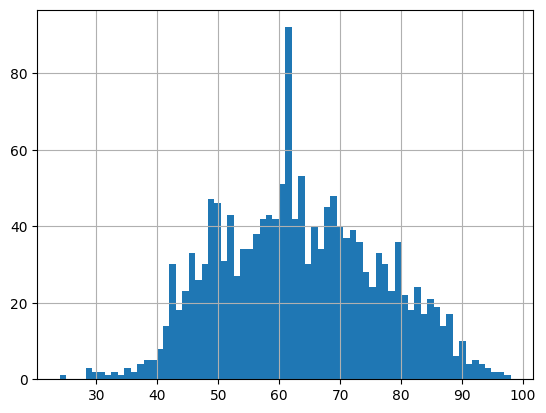

In [145]:
df.age.hist(bins=70)

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

<AxesSubplot: xlabel='age', ylabel='networthusbillion'>

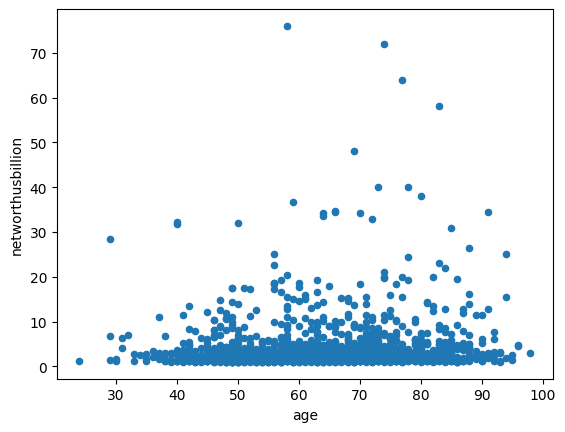

In [146]:
df.plot(kind="scatter", x="age", y="networthusbillion")

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

<AxesSubplot: ylabel='name'>

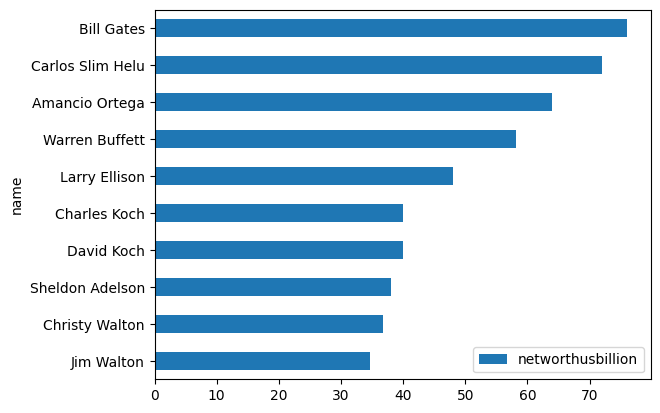

In [154]:
top10 = df.sort_values(by="networthusbillion", ascending=False).head(10)
top10

top10.sort_values(by="networthusbillion").plot(kind="barh", x="name", y="networthusbillion")

